# Clustering with Python · Penguin Colonies

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 09/09/2024

### Context

As a consultant for a scientific organization that works to support and sustain penguin colonies, I am tasked with helping other staff members learn more about penguins and confirm if penguins of the same species exhibit different physical characteristics based on sex, regardless their location. In particular, using the k-means clustering technique.

### Data

The data for this activity is in a spreadsheet called `penguins.csv` that includes datapoints across a sample size of 345 penguins, such as species, island, and sex.

### Execution

Imported libraries.

In [81]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

Loaded and saved the data into a variable named `penguins`.

In [2]:
penguins = pd.read_csv("penguins.csv")

Reviewed the first 10 rows of data.


In [3]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


To cluster penguins of multiple different species, determined how many different types of penguin species are in the dataset.

In [17]:
len(penguins.species.unique())

3

Found the count of each species type.

In [16]:
penguins.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Observation:** There are 3 types of species. The Chinstrap species is less common than the other species, which may have an affect on K-means clustering.

Since an assumption of k-means is that there are no missing values, checked for missing values in the rows of the data. 

In [38]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Dropped the rows with missing values and saved the resulting pandas DataFrame in a variable named `penguins_subset`.

In [39]:
penguins_subset = penguins.dropna().reset_index(drop = True)

Next, checked to make sure that `penguins_subset` does not contain any missing values.

In [40]:
penguins_subset.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now, reviewed the first 10 rows of the subset.

In [41]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


Since some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE', made it sure that all values are ALL CAPS. 


In [42]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

Since k-means needs numeric columns for clustering, converted the categorical column `sex` into numeric.

In [43]:
dummy_df = pd.get_dummies(penguins_subset['sex'], drop_first = True)
penguins_subset = pd.concat([penguins_subset, dummy_df], axis = 1)

penguins_subset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0


Dropped the unused categorical column `island` and original `sex` column from the dataset.

In [44]:
penguins_subset.drop(columns = ['sex', 'island'], axis = 1, inplace = True)

penguins_subset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,MALE
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,0
329,Gentoo,46.8,14.3,215.0,4850.0,0
330,Gentoo,50.4,15.7,222.0,5750.0,1
331,Gentoo,45.2,14.8,212.0,5200.0,0


Copied all the features except the `species` column to a DataFrame called `x` for convenience.

In [52]:
x = penguins_subset.drop(columns = 'species', axis = 1)
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
328,47.2,13.7,214.0,4925.0,0
329,46.8,14.3,215.0,4850.0,0
330,50.4,15.7,222.0,5750.0,1
331,45.2,14.8,212.0,5200.0,0


Because k-means uses distance between observations as its measure of similarity, scaled all the features in `x` using `StandardScaler`. 

In [53]:
from sklearn.preprocessing import StandardScaler

x = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns)
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,MALE
0,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,-0.859415,1.747026,-0.783651,-0.692852,0.991031
...,...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957,-1.009050
329,0.514098,-1.457000,1.002739,0.799674,-1.009050
330,1.173384,-0.744994,1.502928,1.919069,0.991031
331,0.221082,-1.202712,0.788372,1.234995,-1.009050


Now, it was time to fit k-means model and evaluate inertia for different values of k. To do this, built a function called `best_k_finder` that takes in `k` (number of clusters) and `data` (scaled `x` dataset) and returns a list of inertia metrics for each value of k.

In [54]:
def best_k_finder(k, data):
    inertias = []
    for n in k:
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

Used the `best_k_finder` function to return a list of inertias for values of k from 2 to 10.

In [57]:
inertias = best_k_finder(range(2,11), x)
inertias

[885.6224143652249,
 578.8284278107235,
 386.14534424773285,
 284.5464837898288,
 217.92858573807678,
 201.39287843423264,
 185.461310432323,
 173.74554250394394,
 165.11904066313815]

Next, created a line plot that shows the relationship between `k` and `inertias`.

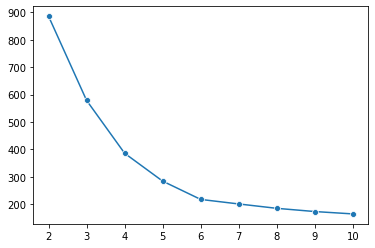

In [66]:
sns.lineplot(range(2,11), inertias, marker = 'o')

**Observation:** The plot seems to depict an elbow at 6 clusters (k = 6).

Created a function called `best_sil_finder` that takes in `k` and `data` (scaled `x` dataset) and returns a list of each k-value's silhouette score.

In [63]:
def best_sil_finder(k, data):
    silhouettes = []
    for n in k:
        kmeans = KMeans(n_clusters = n)
        kmeans.fit(data)
        silhouettes.append(silhouette_score(data, kmeans.labels_))
    return silhouettes

Applied the function to obtain silhouette scores for every value of k from 2 to 10. 

In [67]:
silhouettes = best_sil_finder(range(2,11), x)
silhouettes

[0.44398088353055243,
 0.45101024097188364,
 0.5080140996630784,
 0.519998574860868,
 0.5263224884981607,
 0.47774022332151733,
 0.42680523270292947,
 0.3605641143153135,
 0.3498962127355556]

Next, created a line plot that shows the relationship between each `k` and `silhouettes`.

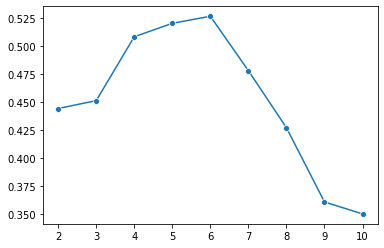

In [68]:
sns.lineplot(range(2,11), silhouettes, marker = 'o')

**Observation:** The plot indicates that the silhouette score is closest to 1 when the data is partitioned into 6 clusters, although five clusters also yield a relatively good silhouette score.

To decide on an optimal k-value, fitted a 6-cluster model to the dataset. 

In [69]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Printed out the unique labels of the fitted model.

In [71]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

Now, created a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset` in order to understand the meaning of each cluster's labels.

In [72]:
penguins_subset['cluster'] = kmeans.labels_

penguins_subset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,2
1,Adelie,39.5,17.4,186.0,3800.0,0,4
2,Adelie,40.3,18.0,195.0,3250.0,0,4
3,Adelie,36.7,19.3,193.0,3450.0,0,4
4,Adelie,39.3,20.6,190.0,3650.0,1,2
...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,0,3
329,Gentoo,46.8,14.3,215.0,4850.0,0,3
330,Gentoo,50.4,15.7,222.0,5750.0,1,1
331,Gentoo,45.2,14.8,212.0,5200.0,0,3


Used `groupby` to verify if any `cluster` can be differentiated by `species`.

In [76]:
penguins_subset.groupby(['cluster', 'species']).size()

cluster  species  
0        Chinstrap    29
1        Gentoo       61
2        Adelie       70
3        Gentoo       58
4        Adelie       73
         Chinstrap     5
5        Adelie        3
         Chinstrap    34
dtype: int64

Although the results of grouping show that each `cluster` can be differentiated by `species`, interpreted the outputs through visualization.

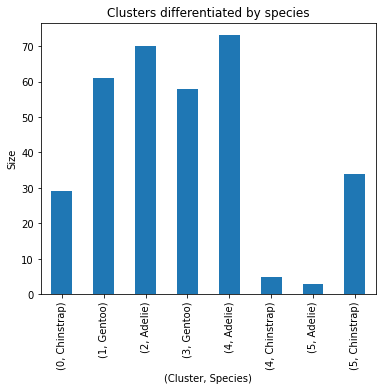

In [77]:
penguins_subset.groupby(by = ['cluster', 'species']).size().plot.bar(title = 'Clusters differentiated by species',
                                                                   figsize = (6, 5),
                                                                   ylabel = 'Size',
                                                                   xlabel = '(Cluster, Species)')

**Observation:** The graph shows that each `cluster` can be differentiated by `species`.

Used `groupby` to verify if each `cluster` can be differentiated by `species` and `sex_MALE` as well.

In [86]:
penguins_subset.groupby(['cluster', 'species', 'MALE']).size().sort_values()

cluster  species    MALE
5        Adelie     1        3
4        Chinstrap  0        5
0        Chinstrap  0       29
5        Chinstrap  1       34
3        Gentoo     0       58
1        Gentoo     1       61
2        Adelie     1       70
4        Adelie     0       73
dtype: int64

**Observation:** Even though clusters 0, 1 and 3 aren't all of one `species` or `sex`, the grouping indicates that the algorithm produced clusters mostly differentiated by `species` and `sex`.

Finally, visualized the resent grouping results.

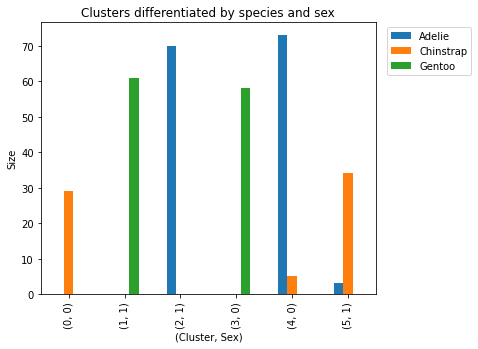

In [82]:
penguins_subset.groupby(by = 
                        ['cluster','species','MALE']).size().unstack(level = 
                                                                     'species', fill_value = 0).plot.bar(
    title = 'Clusters differentiated by species and sex', figsize = (6, 5), ylabel = 'Size', 
    xlabel = '(Cluster, Sex)')

plt.legend(bbox_to_anchor=(1.3, 1.0))

**Observation:** The graph shows that each `cluster` can be differentiated by `species` and `sex_MALE`. Furthermore, each cluster is mostly comprised of one `sex` and one `species`.

**Summary:**

* Having 6 clusters makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters).
* The k-means clustering enabled this data to be effectively grouped, it helped identify patterns that can educate team members about penguins.
* The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.

### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analytics Professional Certificate on Coursera.